# Analysis of CATE Estimates by Meta-Learner and Demographics

This notebook provides a comprehensive analysis of Conditional Average Treatment Effect (CATE) estimates generated by different meta-learners. The analysis includes data loading, merging, visualization, and comparison of CATE estimates across various demographic variables and meta-learners.

## Data Loading and Preparation

1. **Loading Data**:
    - The main dataset and CATE predictions on test set from different meta-learners (S-Learner, T-Learner, X-Learner, R-Learner) are loaded.
    - The datasets are read from CSV files and displayed to understand their structure.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the main dataset and CATE predictions
data = pd.read_csv('../../data/analysis_data/dataset.csv')
s_predictions = pd.read_csv('../../results/analysis_data_results/test_data/s_predictions.csv')
t_predictions = pd.read_csv('../../results/analysis_data_results/test_data/t_predictions.csv')
x_predictions = pd.read_csv('../../results/analysis_data_results/test_data/x_predictions.csv')
r_predictions = pd.read_csv('../../results/analysis_data_results/test_data/r_predictions.csv')
print(s_predictions.head())
print(t_predictions.head())
print(x_predictions.head())
print(r_predictions.head())

   PreInterventionFixedMindset  SchoolAchievementLevel  \
0                    -0.439024                0.638664   
1                    -0.509044               -0.245513   
2                    -0.214474                1.362762   
3                    -0.326688                1.290629   
4                     0.254433               -0.187237   

   SchoolMinorityComposition  PovertyConcentration  TotalStudentPopulation  \
0                  -0.447305             -0.134067                0.197014   
1                  -1.275983             -0.005205               -1.004449   
2                  -1.056557             -1.082470                0.348322   
3                  -0.763398             -1.160290                0.831021   
4                   1.333675             -0.307735                0.375201   

   schoolid  StudentRaceEthnicity  StudentGender  FirstGenCollegeStatus  \
0       7.0                  13.0            1.0                    1.0   
1       5.0                   4.

2. **Merging Predictions**:
    - Predictions from different meta-learners are merged into a single DataFrame for easier comparison and visualization.
    - The merged data is used to plot correlations between different CATE predictions.

In [2]:
# Merge the predictions into a single dataframe
merged_data = pd.concat([
    s_predictions[['s_CATE']],
    t_predictions[['t_CATE']],
    x_predictions[['x_CATE']],
    r_predictions[['r_CATE']]
], axis=1)

## Visualization of CATE Estimates

3. **Correlation Matrix**:
    - A heatmap is plotted to visualize the correlation matrix of CATE estimates from different meta-learners.

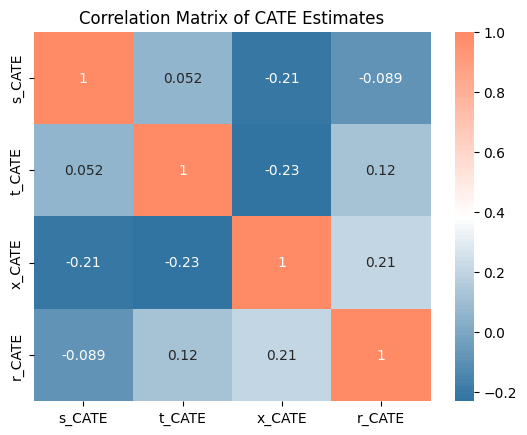

In [3]:
# Plot correlations between different CATE predictions
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# creating matching color scheme with other images for consistency
blue = np.array([50, 116, 161]) / 255  # Convert RGB to [0, 1] scale
orange = np.array([255, 138, 102]) / 255

# Create a colormap
colors = [blue, "white", orange]  # white for neutral, blue and orange for diverging
cmap_name = 'custom_coolwarm'
n_bins = 100  # Increase or decrease according to your preference
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


corr = merged_data.corr()
sns.heatmap(corr, annot=True, cmap=custom_cmap)
plt.title('Correlation Matrix of CATE Estimates')
plt.show()

The correlation matrix (Figure 7) highlights the relationships between the CATE estimates
of different meta-learners. Notable observations include:

* Weak correlations between the learners, with the highest correlation observed between
X-Learner and R-Learner (r = 0.21).
* S-Learner and T-Learner exhibit a weak positive correlation (r = 0.05), indicating
minimal agreement in their treatment effect predictions

7. **Combined Data for Meta-Learners**:
    - Predictions from all meta-learners are combined into a single DataFrame.
    - This combined data is used for further visualizations and comparisons.

In [4]:
# File paths for predictions
file_paths = {
    's_CATE': '../../results/analysis_data_results/test_data/s_predictions.csv',
    't_CATE': '../../results/analysis_data_results/test_data/t_predictions.csv',
    'x_CATE': '../../results/analysis_data_results/test_data/x_predictions.csv',
    'r_CATE': '../../results/analysis_data_results/test_data/r_predictions.csv'
}

# Load predictions from all meta-learners
meta_learner_dfs = []
for learner, path in file_paths.items():
    df = pd.read_csv(path)
    df['MetaLearner'] = learner
    meta_learner_dfs.append(df)

# Combine all meta-learner predictions into one DataFrame
combined_data = pd.concat(meta_learner_dfs, ignore_index=True)

# Columns to group by for visualization
categorical_columns = ['schoolid', 'StudentRaceEthnicity', 'StudentGender', 'FirstGenCollegeStatus', 'SchoolUrbanicity']
continuous_columns = ['PreInterventionFixedMindset', 'SchoolAchievementLevel', 'SchoolMinorityComposition',
                      'PovertyConcentration', 'TotalStudentPopulation']


combined_data.head()

,PreInterventionFixedMindset,SchoolAchievementLevel,SchoolMinorityComposition,PovertyConcentration,TotalStudentPopulation,schoolid,StudentRaceEthnicity,StudentGender,FirstGenCollegeStatus,SchoolUrbanicity,treatment,s_CATE,MetaLearner,t_CATE,x_CATE,r_CATE
0,-0.439024,0.638664,-0.447305,-0.134067,0.197014,7.0,13.0,1.0,1.0,1.0,0,0.002753,s_CATE,NaN,NaN,NaN
1,-0.509044,-0.245513,-1.275983,-0.005205,-1.004449,5.0,4.0,2.0,0.0,1.0,1,-0.001241,s_CATE,NaN,NaN,NaN
2,-0.214474,1.362762,-1.056557,-1.082470,0.348322,6.0,4.0,2.0,1.0,2.0,0,0.000319,s_CATE,NaN,NaN,NaN
3,-0.326688,1.290629,-0.763398,-1.160290,0.831021,6.0,1.0,2.0,0.0,2.0,1,-0.000936,s_CATE,NaN,NaN,NaN
4,0.254433,-0.187237,1.333675,-0.307735,0.375201,5.0,2.0,2.0,1.0,4.0,0,0.000013,s_CATE,NaN,NaN,NaN


8. **Visualization Functions**:
    - Two functions, `visualize_cate_by_category` and `visualize_cate_by_continuous`, are defined to create bar plots and line plots for categorical and continuous variables, respectively.
    - These functions are used to visualize CATE estimates by various demographic variables.

In [5]:
def visualize_cate_by_category(data, cate_columns, category_col, meta_learners, title_prefix="CATE by Category"):
    """
    Visualize the CATE for treated and control groups for each meta-learner by category, 
    with each meta-learner in its own subplot.
    
    Parameters:
    - data: DataFrame containing CATE, category, and treatment data.
    - cate_columns: List of column names representing the CATE for each meta-learner.
    - category_col: Column name representing the categorical variable.
    - meta_learners: List of meta-learner names corresponding to cate_columns.
    - title_prefix: Title prefix for the plots.
    """
    num_meta_learners = len(meta_learners)
    plt.figure(figsize=(16, 10))
    
    for i, (cate_col, meta_learner) in enumerate(zip(cate_columns, meta_learners), start=1):
        plt.subplot(2, 2, i)  # Adjust layout as 2 rows and 2 columns for 4 graphs
        sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
        plt.title(f"{title_prefix}: {meta_learner}")
        plt.xticks(rotation=45)
        plt.xlabel(category_col)
        plt.ylabel("Average CATE")
        plt.legend(title="Group", loc="upper right")
    
    plt.tight_layout()
    plt.show()


In [6]:
def visualize_cate_by_continuous(data, cate_columns, continuous_col, meta_learners, title_prefix="CATE by Continuous Variable"):
    """
    Visualize the CATE for treated and control groups for each meta-learner by a continuous variable,
    with each meta-learner in its own subplot.

    Parameters:
    - data: DataFrame containing CATE, continuous variable, and treatment data.
    - cate_columns: List of column names representing the CATE for each meta-learner.
    - continuous_col: Column name representing the continuous variable.
    - meta_learners: List of meta-learner names corresponding to cate_columns.
    - title_prefix: Title prefix for the plots.
    """
    num_meta_learners = len(meta_learners)
    plt.figure(figsize=(16, 10))
    
    for i, (cate_col, meta_learner) in enumerate(zip(cate_columns, meta_learners), start=1):
        plt.subplot(2, 2, i)  # Adjust layout as 2 rows and 2 columns for 4 graphs
        sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
        plt.title(f"{title_prefix}: {meta_learner}")
        plt.xlabel(continuous_col)
        plt.ylabel("CATE")
        plt.legend(title="Group", loc="best")
    
    plt.tight_layout()
    plt.show()


In [7]:
# List of CATE columns and corresponding meta-learners
cate_columns = ["s_CATE", "t_CATE", "x_CATE","r_CATE"] 
meta_learners = ["S-Learner", "T-Learner", "X-Learner","R-Learner"] 

C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)


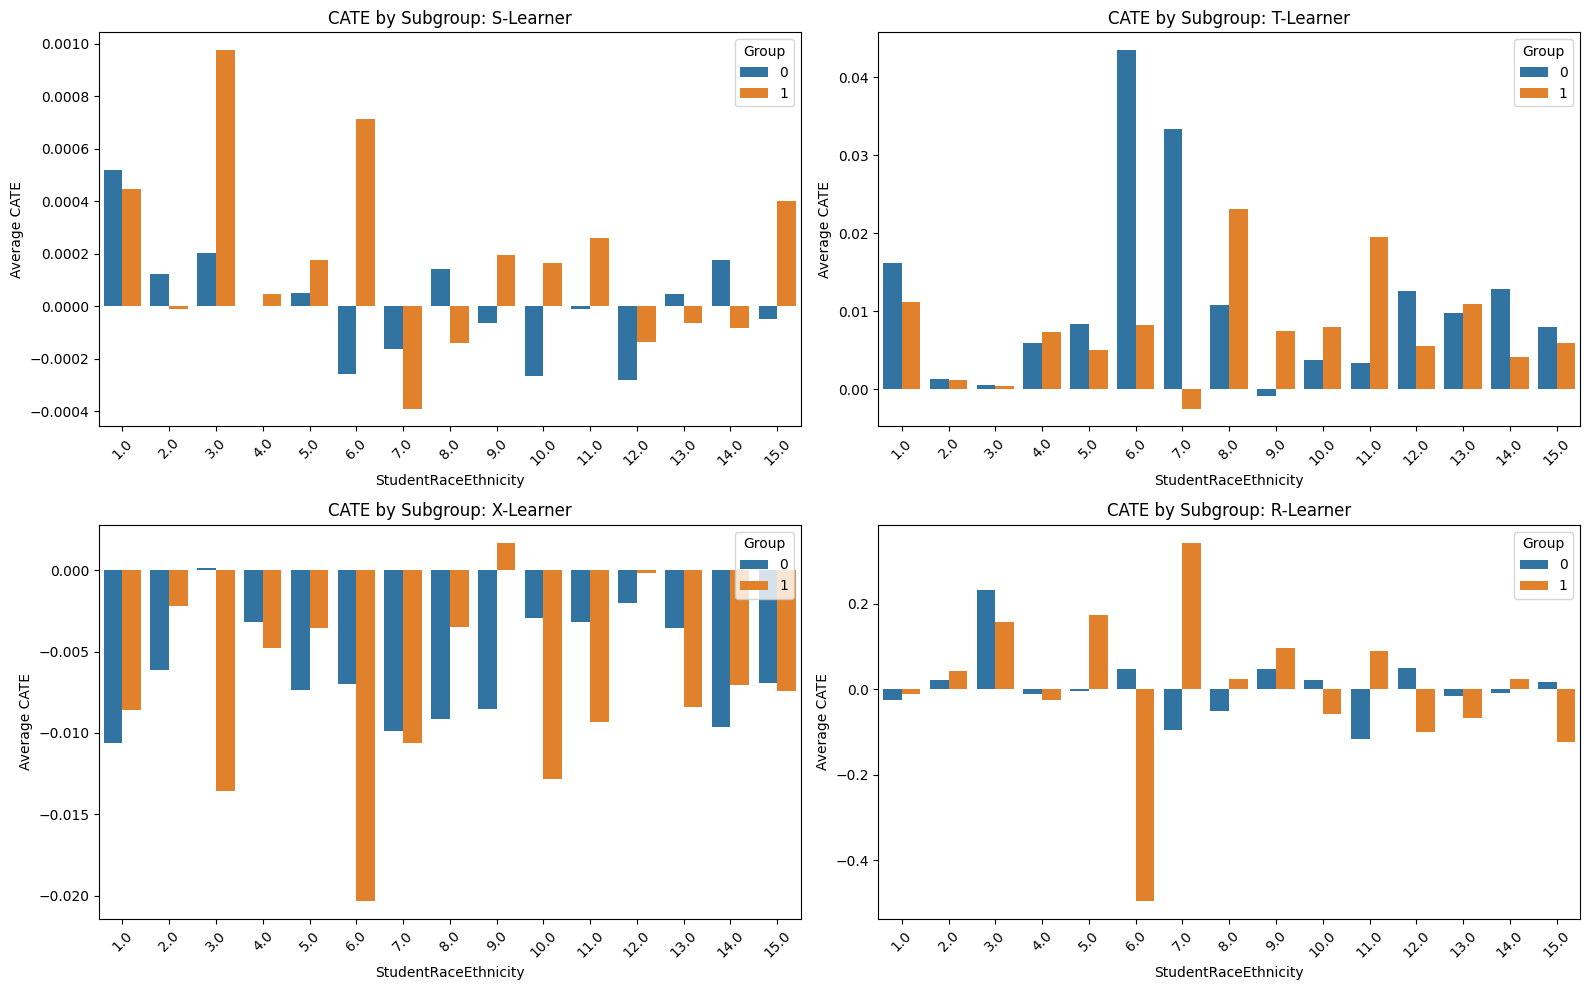

In [8]:
# Loop over each categorical variable StudentRaceEthnicity
visualize_cate_by_category(combined_data, cate_columns, 'StudentRaceEthnicity', meta_learners, title_prefix="CATE by Subgroup")

* The S-learner shows relatively consistent CATE estimates across subgroups for both treated (Group 1) and control (Group 0) populations, with minimal variability. The treated group generally shows slightly higher positive effects. 
* The T-learner seem to capture stronger treatment effects for specific subgroups, such as Subgroup 6 and Subgroup 7, primarily in the control population, while the treated population has exhibited near-zero CATE estimates. 
* The X-learner and R-learner are exhibiteing wider variability in CATE estimates across subgroups, with notable differences between treated and control populations. For example, Subgroup 6 in the treated population is showing strong negative effects in both models. Certain racial/ethnic subgroups, such as Subgroup 10 is displaying higher variability in treatment effects. This variability is particularly pronounced in the treated group and is emphasized by the X-learner and R-learner models, indicating potential demographic-specific sensitivities to the intervention.

C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)


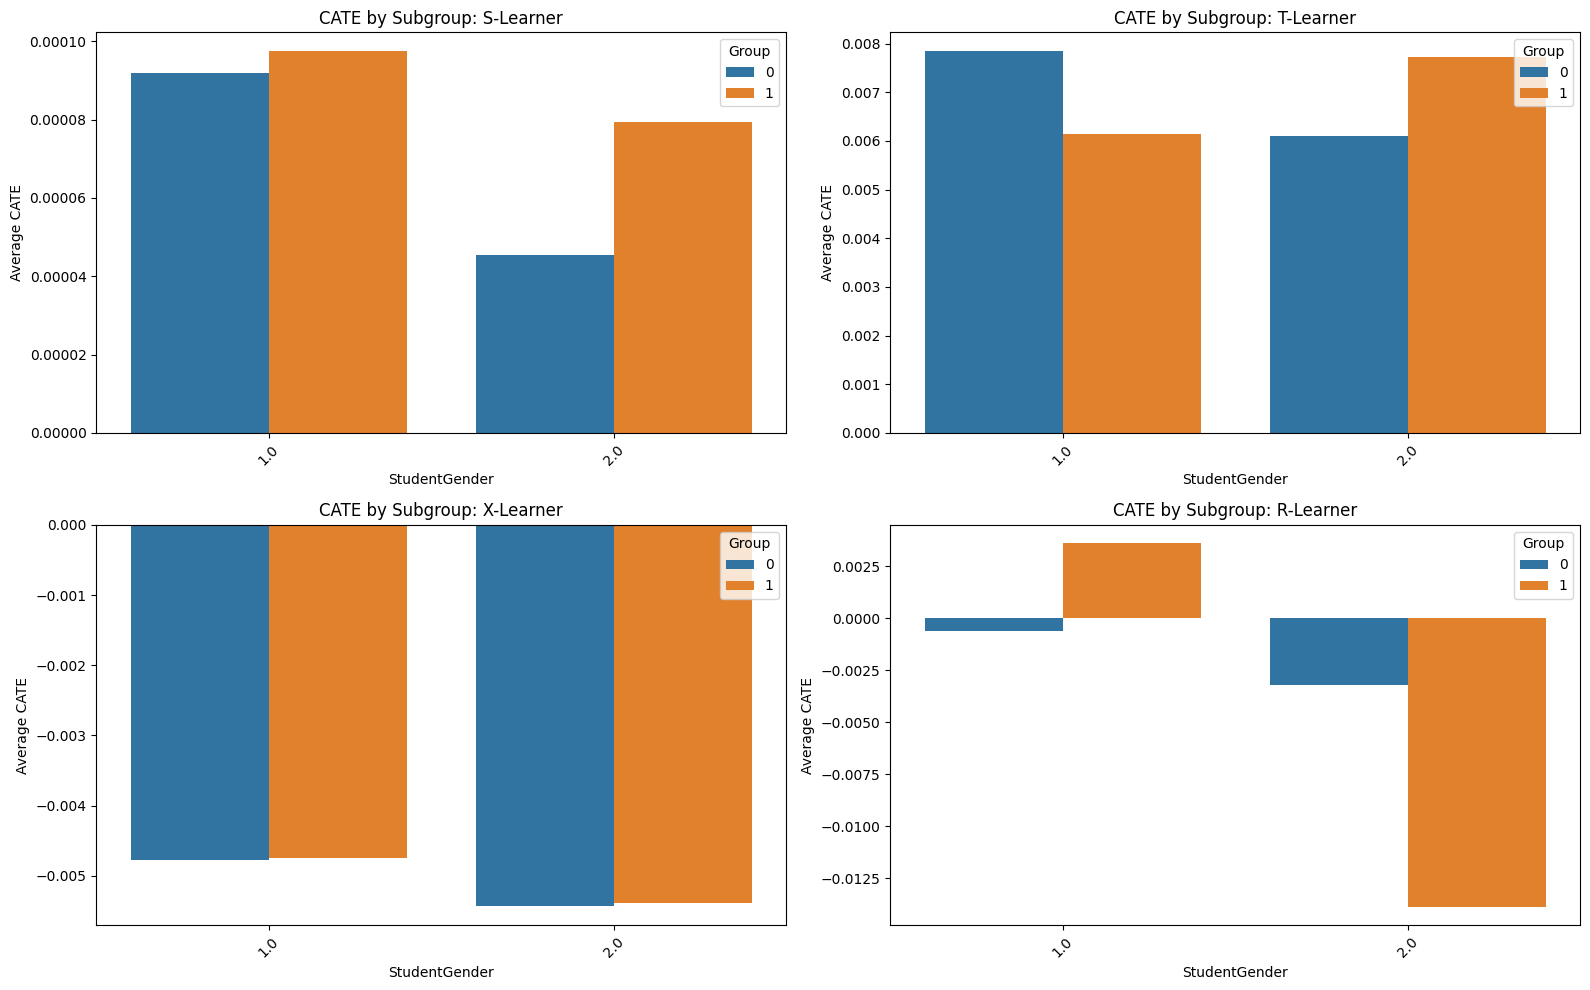

In [9]:
# Loop over each categorical variable StudentGender
visualize_cate_by_category(combined_data, cate_columns, 'StudentGender', meta_learners, title_prefix="CATE by Subgroup")

* The S-learner and T-learner show consistently positive Conditional Average Treatment Effects (CATE) for both genders, with the treated group (Group 1) exhibiting slightly higher effects compared to the control group (Group 0), particularly for Gender 2 in the T-learner. 
* The X-learner shows negligible treatment effects, with CATE estimates near zero and no significant differences between genders or groups. In contrast, the R-learner highlights strong gender-specific effects, with Gender 2 in the treated group experiencing notably high positive CATE, while the control group for Gender 2 exhibits large negative CATE. 
* Overall, while most learners suggest minimal gender differences, the R-learner emphasizes demographic-specific treatment sensitivities, particularly for Gender 2.

C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)


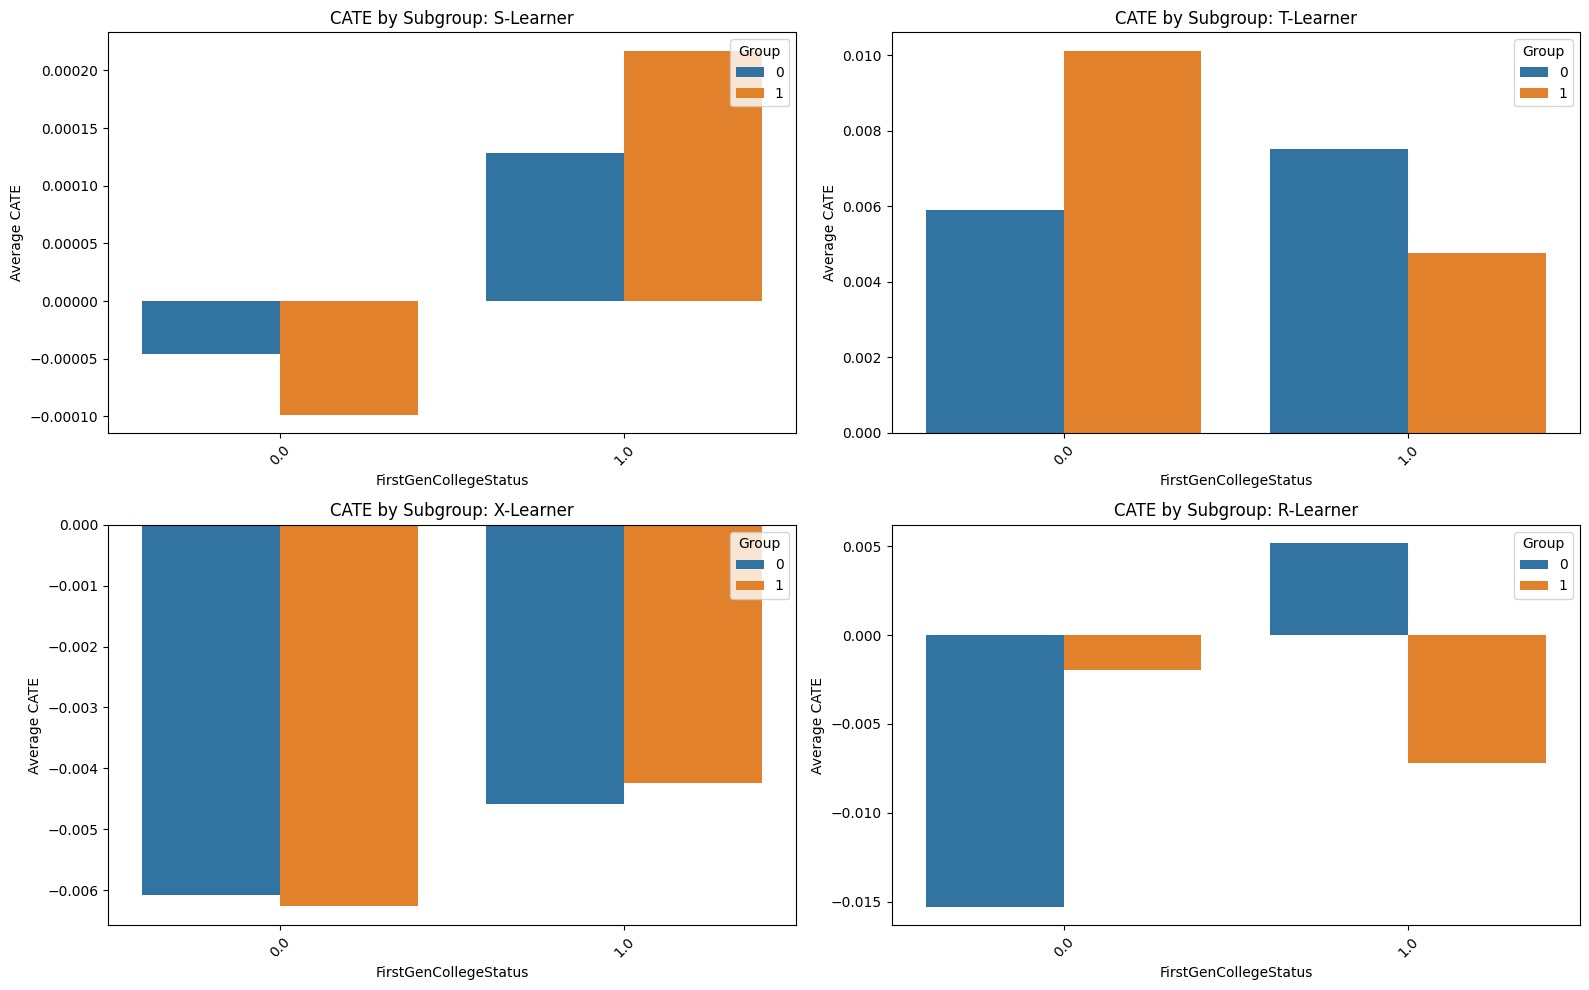

In [10]:
# Loop over each categorical variable FirstGenCollegeStatus
visualize_cate_by_category(combined_data, cate_columns, 'FirstGenCollegeStatus', meta_learners, title_prefix="CATE by Subgroup")

The S-learner and T-learner demonstrated consistently positive treatment effects for first-generation students. The R-learner exhibited the highest variability, with amplified positive effects for control first-generation students (Group 0) and large negative effects for non first-generation control students (Group 0).

C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)


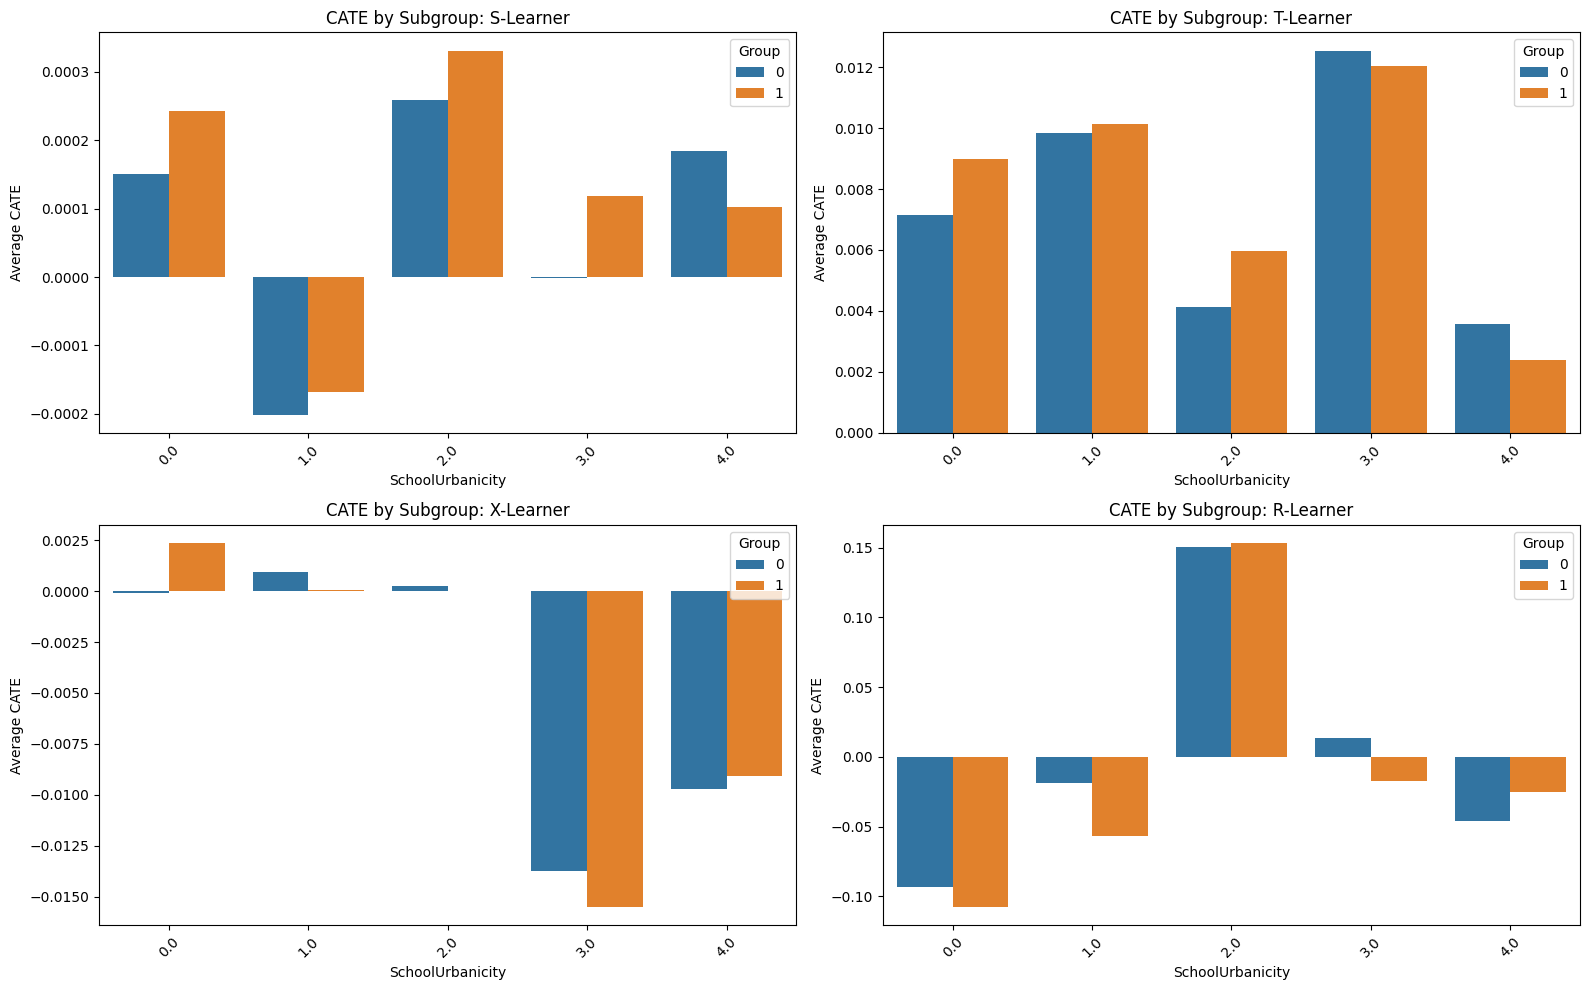

In [11]:
# Loop over each categorical variable SchoolUrbanicity
visualize_cate_by_category(combined_data, cate_columns, 'SchoolUrbanicity', meta_learners, title_prefix="CATE by Subgroup")

Suburban schools (Urbanicity Level 2) consistently exhibited the highest treatment effects, particularly for the S-learner and T-learner. Urban schools (Level 3) and highly urbanized schools (Level 4) showed reduced or negative treatment effects in models like the X-learner and R-learner. Rural schools (Urbanicity Level 0) showed moderate positive effects, especially in the treated group for the S-learner and T-learner. The R-learner captured significant variability across urbanicity categories, highlighting large positive effects for suburban schools and negative effects for urban and highly urbanized schools.

C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)


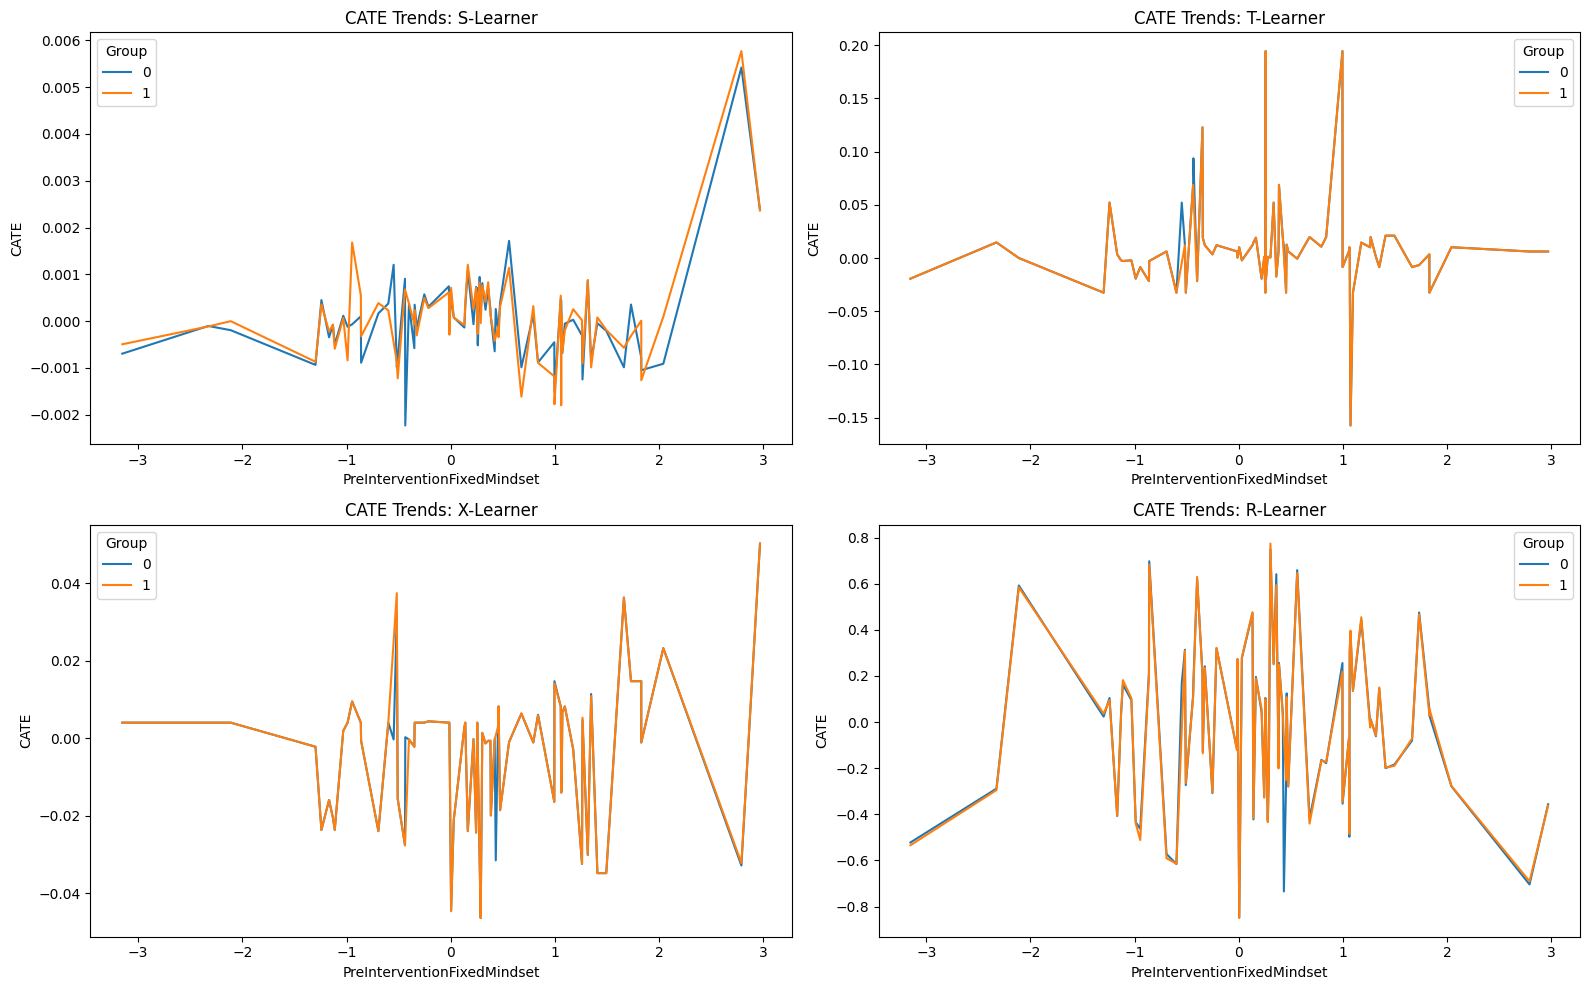

In [12]:
# Loop over each continuous variable PreInterventionFixedMindset
visualize_cate_by_continuous(combined_data, cate_columns, 'PreInterventionFixedMindset', meta_learners, title_prefix="CATE Trends")


C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)


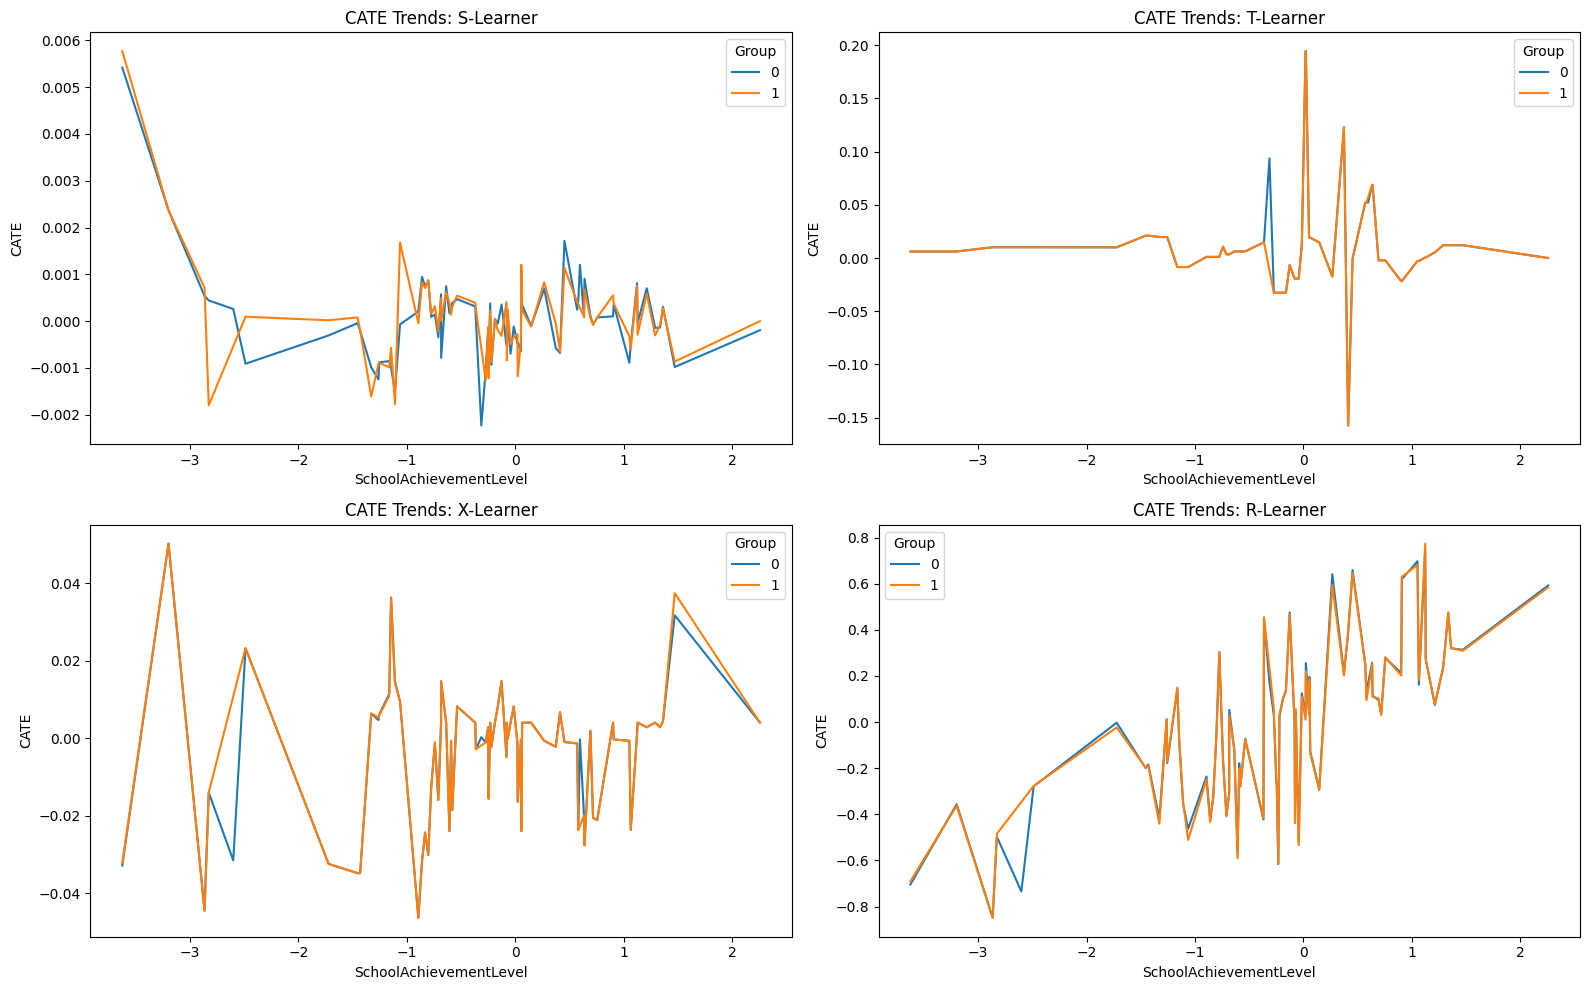

In [13]:
# Loop over each continuous variable SchoolAchievementLevel
visualize_cate_by_continuous(combined_data, cate_columns, 'SchoolAchievementLevel', meta_learners, title_prefix="CATE Trends")


C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)


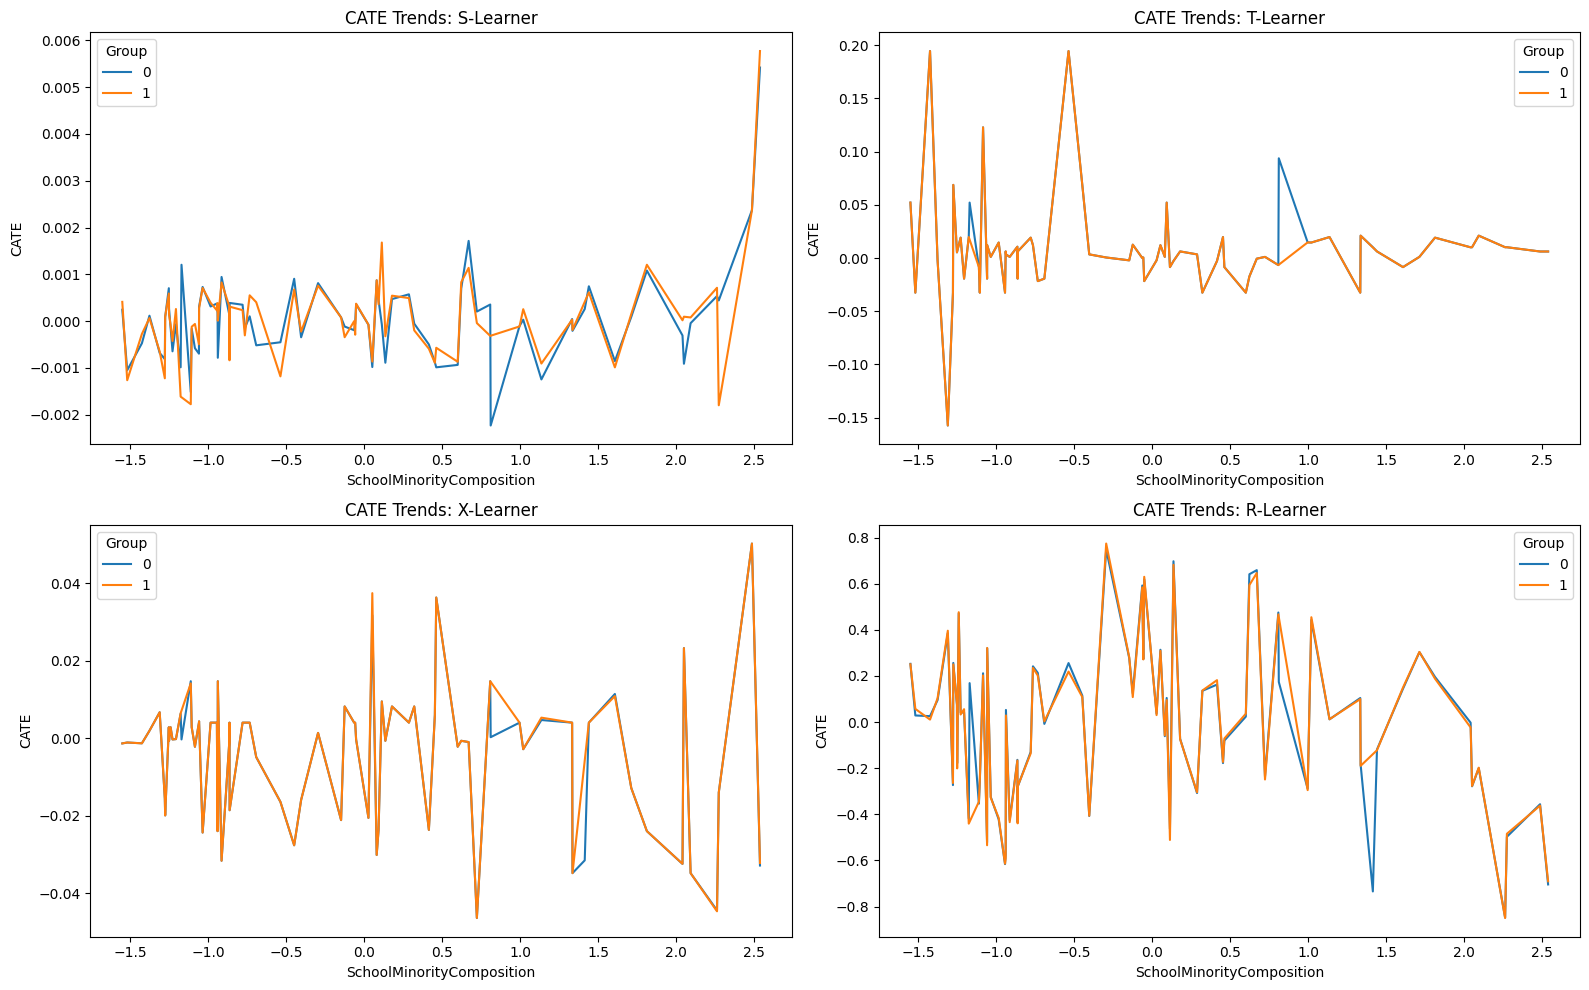

In [14]:
# Loop over each continuous variable SchoolMinorityComposition
visualize_cate_by_continuous(combined_data, cate_columns, 'SchoolMinorityComposition', meta_learners, title_prefix="CATE Trends")


C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)


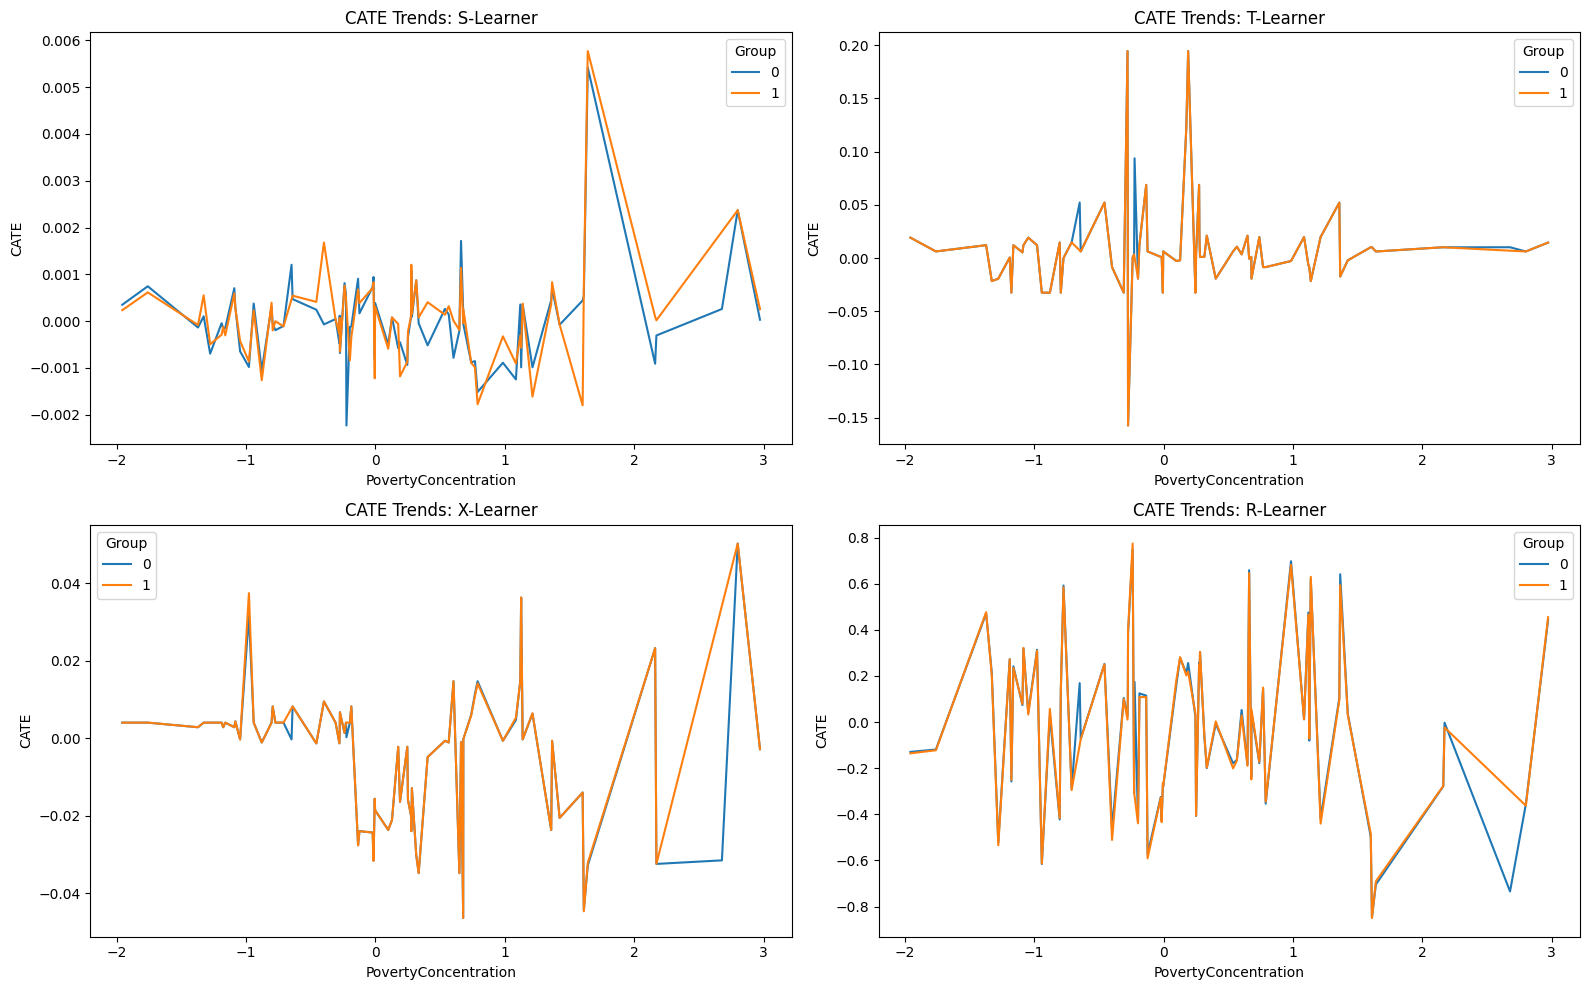

In [15]:
# Loop over each continuous variable PovertyConcentration
visualize_cate_by_continuous(combined_data, cate_columns, 'PovertyConcentration', meta_learners, title_prefix="CATE Trends")


C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_7464\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)


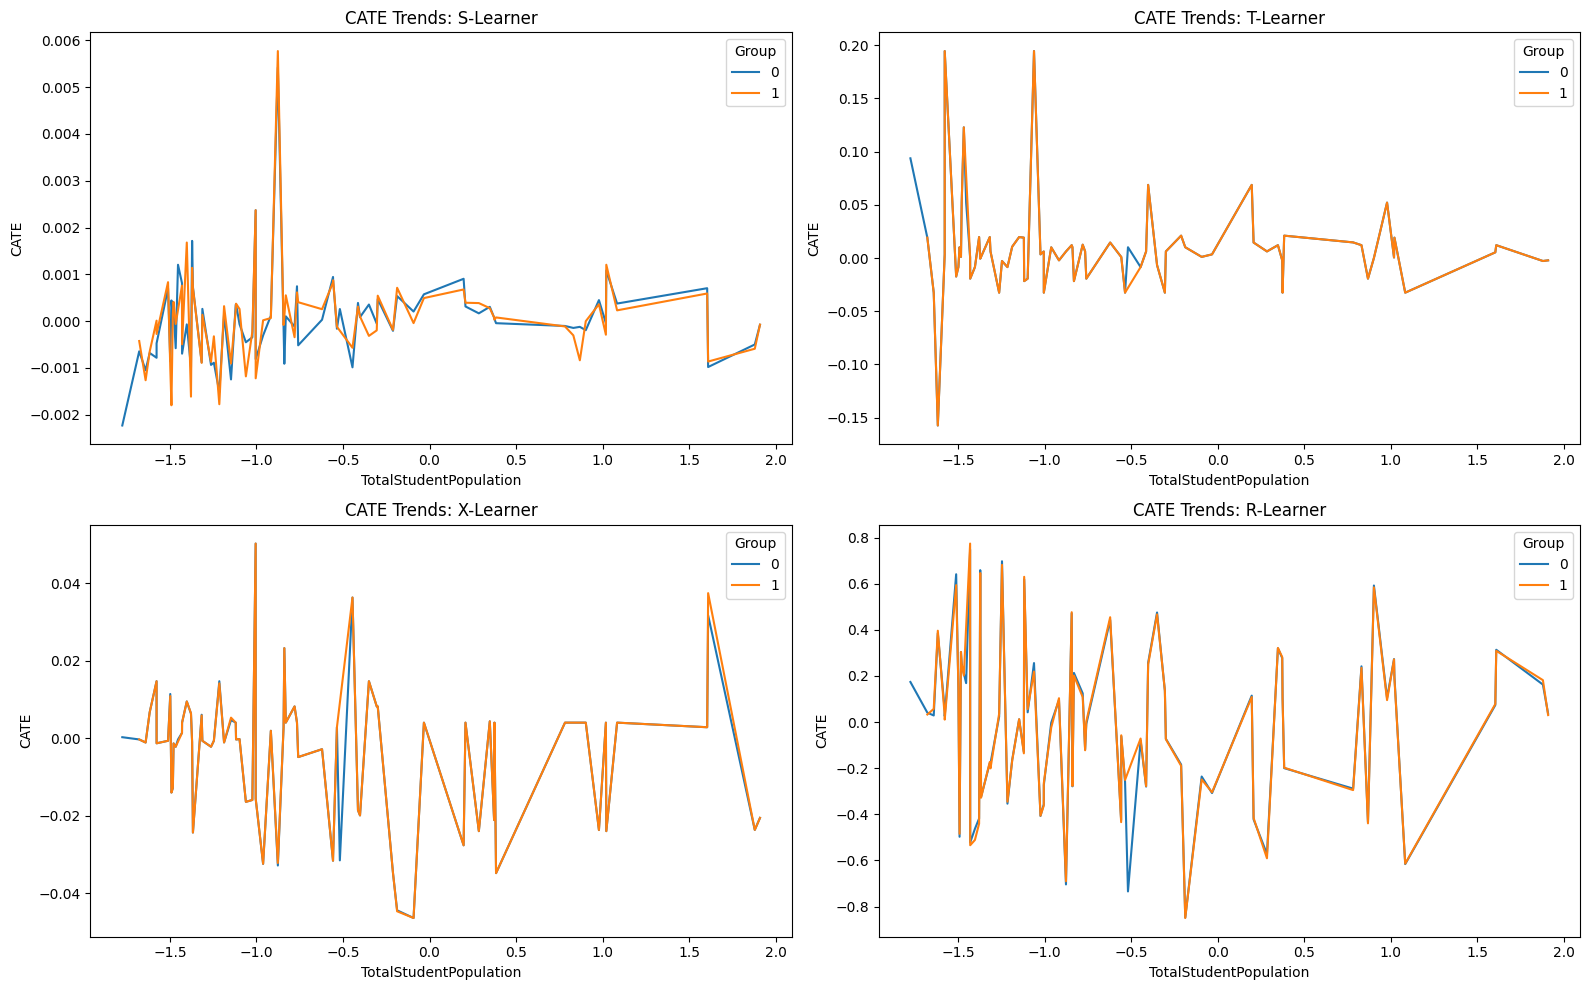

In [16]:
# Loop over each continuous variable TotalStudentPopulation
visualize_cate_by_continuous(combined_data, cate_columns, 'TotalStudentPopulation', meta_learners, title_prefix="CATE Trends")
